In [1]:
import numpy as np, matplotlib.pyplot as plt, xarray as xr, netCDF4 as nc, wrf
from mpltern.ternary.datasets import get_triangular_grid
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy as cp
from analysis_utils import *
from sklearn import cluster
import sklearn as sk
from sklearn.preprocessing import normalize
import PIL, tqdm, os
from scipy import stats
import seaborn as sns
#from matplotlib.cm import get_cmap
#from cartopy.feature import NaturalEarthFeature
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
import haversine as hs
import statsmodels.stats.api as sms
from ipywidgets import interact, IntSlider
from joblib.externals.loky import set_loky_pickler
import datetime

import functools
import operator
#set_loky_pickler("dill")

In [2]:
path_to_KS = '/nird/projects/NS9600K/brittsc/WRF_output_Stian/analysis_data/KS_matrix_seg1_1024H_10members.npy'
KS_matrix = np.load(path_to_KS)

In [5]:
def remove_nan(matrix):
    matrix_nona = matrix[:,~np.all(np.isnan(matrix), axis=0)]
    matrix_nona = matrix_nona[~np.all(np.isnan(matrix_nona), axis=1), :]
    return matrix_nona

In [6]:
KS_nona = remove_nan(KS_matrix)

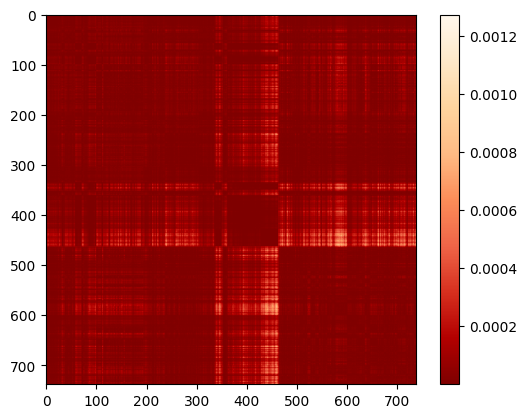

In [99]:
X, Y = np.meshgrid(range(len(KS_nona)), range(len(KS_nona)))
plt.imshow(KS_nona **4, cmap='OrRd_r')#(X, Y, c=KS_matrix)
plt.colorbar()

In [103]:
Cluster = cluster.DBSCAN(eps=0.1, min_samples=5, metric='precomputed')
res = Cluster.fit_predict(KS_nona**4)
# res = np.array([Cluster.fit_predict(KS_nona[:, i].reshape(-1, 1)) for i in range(len(KS_nona))])
res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

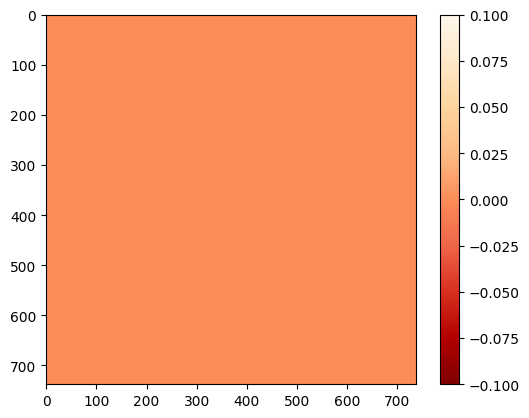

In [101]:
X, Y = np.meshgrid(range(len(res)), range(len(res)))
plt.imshow([res for _ in range(len(res))], cmap='OrRd_r')#(X, Y, c=KS_matrix)
plt.colorbar()

In [47]:
KS_nona[1, :].reshape(1, -1)

array([[0.04577778, 0.03333333, 0.04955556, 0.04111111, 0.04822222,
        0.04333333, 0.04711111, 0.03866667, 0.03933333, 0.03955556,
        0.04022222, 0.03955556, 0.04466667, 0.04044444, 0.04177778,
        0.03711111, 0.04      , 0.04422222, 0.04511111, 0.05644444,
        0.03977778, 0.04      , 0.04111111, 0.04822222, 0.06355556,
        0.04977778, 0.03977778, 0.05311111, 0.06733333, 0.048     ,
        0.04333333, 0.08644444, 0.08177778, 0.08333333, 0.07577778,
        0.04844444, 0.07422222, 0.05022222, 0.05711111, 0.05111111,
        0.04911111, 0.04488889, 0.04288889, 0.04066667, 0.05244444,
        0.04977778, 0.04844444, 0.04177778, 0.04266667, 0.04622222,
        0.04155556, 0.04133333, 0.06777778, 0.04733333, 0.04622222,
        0.04666667, 0.04066667, 0.05      , 0.066     , 0.08733333,
        0.08866667, 0.08044444, 0.06755556, 0.08488889, 0.07111111,
        0.05844444, 0.07688889, 0.07044444, 0.06733333, 0.08866667,
        0.05955556, 0.046     , 0.03466667, 0.05